# 시각화

## #01. 필요한 패키지 및 샘플 데이터 준비

### 1) 패키지 참조

In [3]:
import numpy as np
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot

### 2) 데이터 가져오기

> 데이터 출처 : https://kosis.kr/index/index.do (국가통계포털)

In [4]:
교통사고 = read_csv('traffic.csv', encoding='euc-kr')
교통사고

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 3) 데이터 전처리 (연도별 합계 구하기)

In [5]:
교통사고tmp = 교통사고.filter(['년도', '발생건수', '사망자수', '부상자수'])
교통사고df = 교통사고tmp.groupby('년도').sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


## #02. 그래프에 대한 전역 환경 설정

In [6]:
pyplot.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
pyplot.rcParams["font.size"] = 16                # 글자 크기
pyplot.rcParams["figure.figsize"] = (20,10)       # 그래프의 가로, 세로 크기 (inch단위)

## #03. 선 그래프

### 1. 특정 컬럼에 대한 선 그래프

#### 1) 발생건수에 대한 선그래프

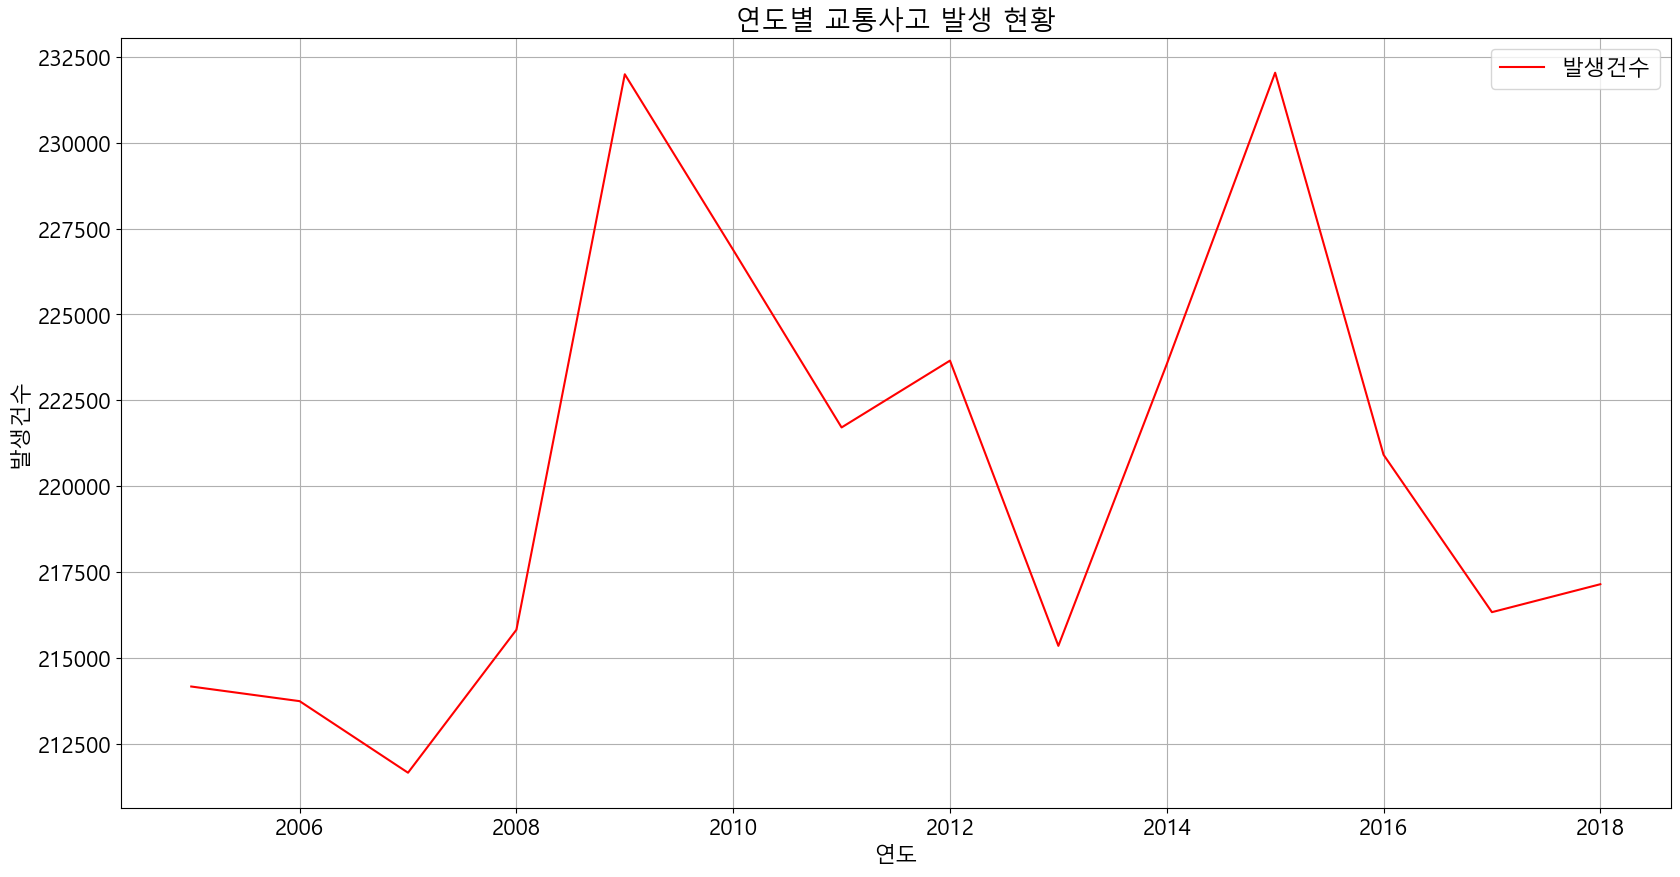

In [8]:
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend() # 범례
pyplot.title('연도별 교통사고 발생 현황')
pyplot.xlabel('연도')
pyplot.ylabel('발생건수')
pyplot.show()

### 2) x축에 대한 텍스트 지정

#### a) x좌표를 의미하는 리스트나 배열 생성

In [9]:
xpos = np.arange(len(교통사고df['발생건수']))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

#### b) x좌표에 적용할 텍스트의 리스트 생성

In [10]:
xtext = list(교통사고df.index)
for i, v in enumerate(xtext) :
    xtext[i] = "%d년" %v

xtext

['2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

#### c) x축에 넣어주자

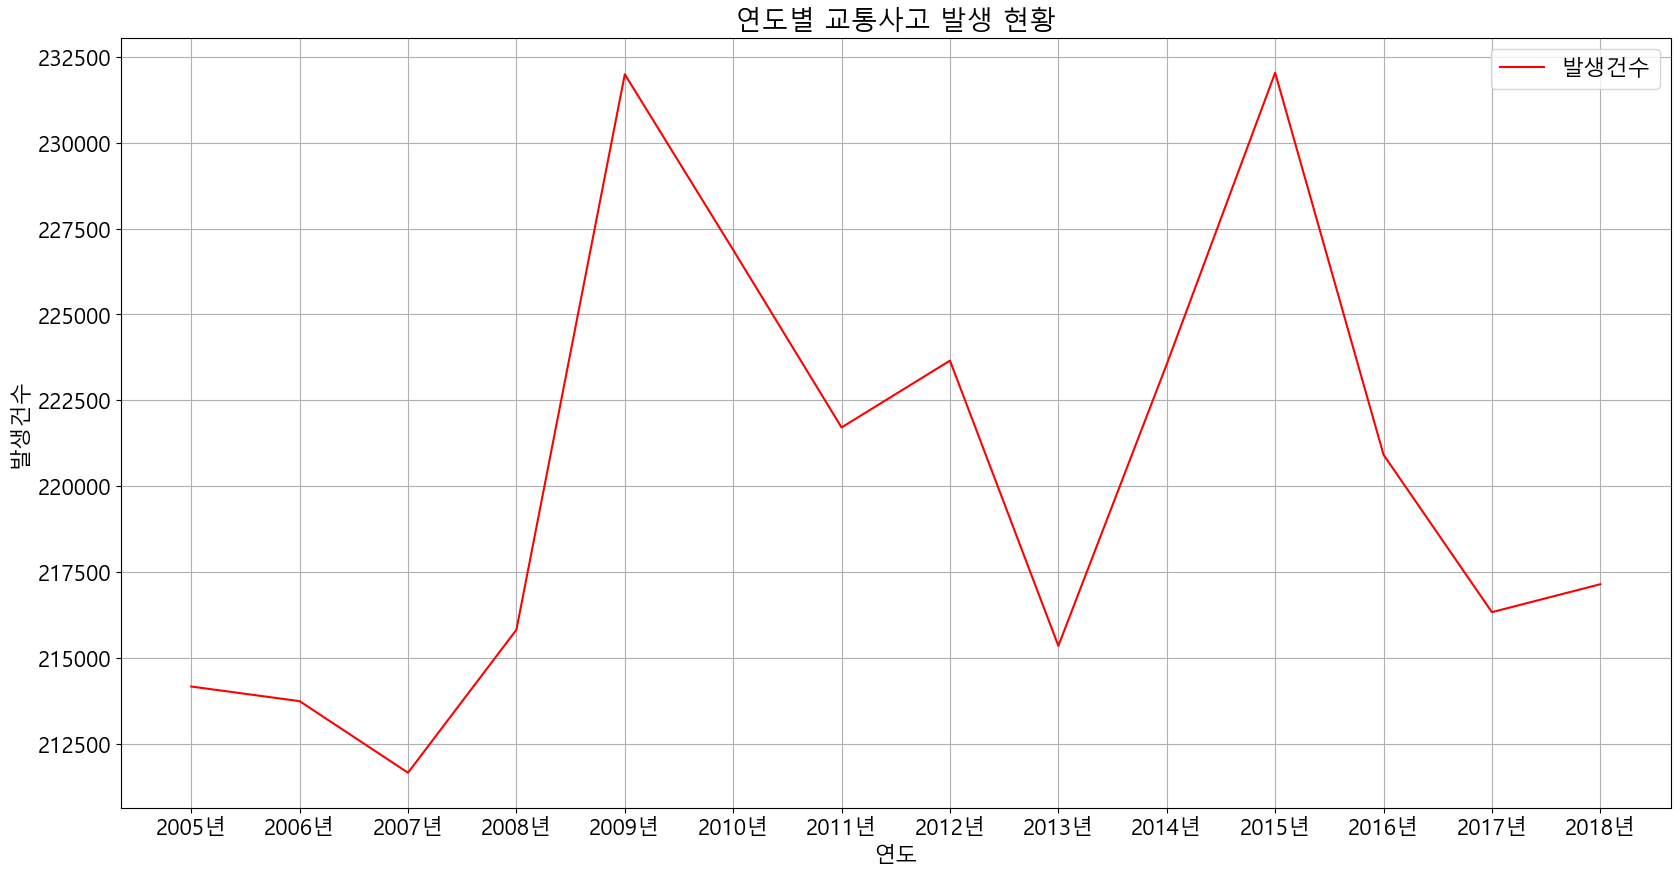

In [13]:
교통사고df['발생건수'].plot(color='#ff0000')
pyplot.grid()
pyplot.legend() # 범례
pyplot.title('연도별 교통사고 발생 현황')
pyplot.xlabel('연도')
pyplot.ylabel('발생건수')
# 만들어 놓은 텍스트 리스트를 x축(행, index)에 넣기 
# xticks(데이터프레임.index , 텍스트리스트)
pyplot.xticks(교통사고df.index, xtext) 
pyplot.show()

## =========================================================

In [ ]:
### 2. 전체 컬럼에 대한 다중 선 그래프 

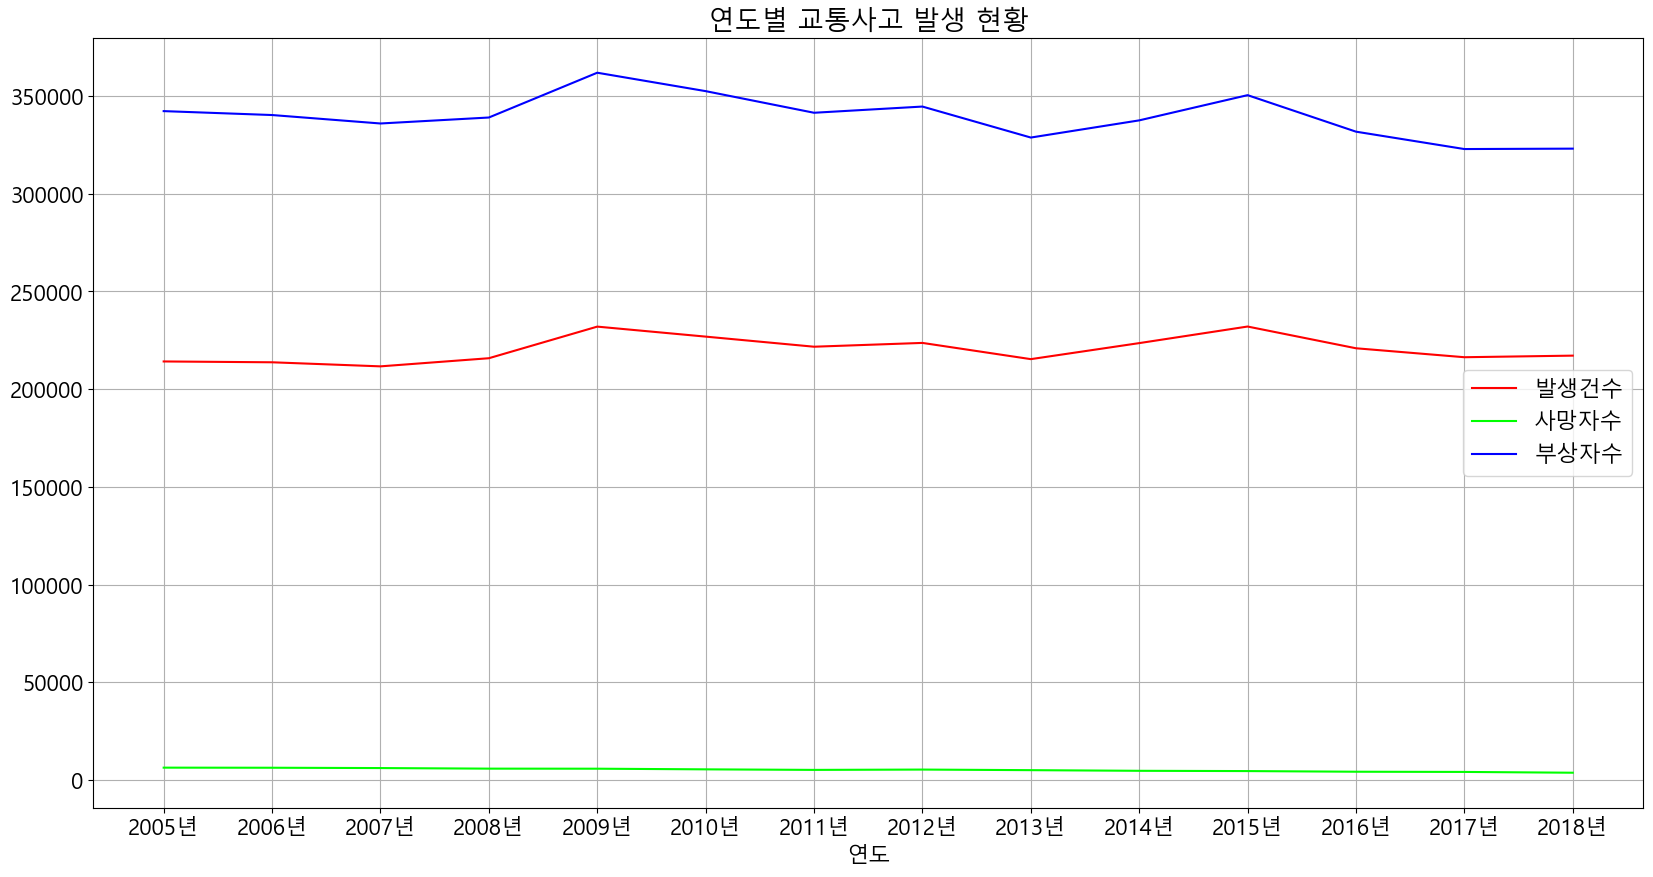

In [14]:
교통사고df.plot(color=['#ff0000', '#00ff00', '#0000ff'])
pyplot.grid()
pyplot.legend() # 범례
pyplot.title('연도별 교통사고 발생 현황')
pyplot.xlabel('연도')
# 만들어 놓은 텍스트 리스트를 x축(행, index)에 넣기 
# xticks(데이터프레임.index , 텍스트리스트)
pyplot.xticks(교통사고df.index, xtext) 
pyplot.show()

## =====================================================

## #04. 세로 막대 그래프
### 1) 특정 컬럼에 대한 시각화
#### 기본 옵션만 사용하기 
> `데이터프레임객체['컬럼'].plot.bar()`

* rot 파라미터는  x 축 텍스트의 각도, 기본값 90
* width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정, 기본값은 0.5

막대그래프는 index의 데이터 타입이 숫자, 문자열에 상관없이 x축이 0부터 시작되는 좌표계를 갖는다.

그러므로 `xticks()` 함수를 사용할 때 반드시 x 축 좌표에 대한 지정이 이루어져야 한다.기 

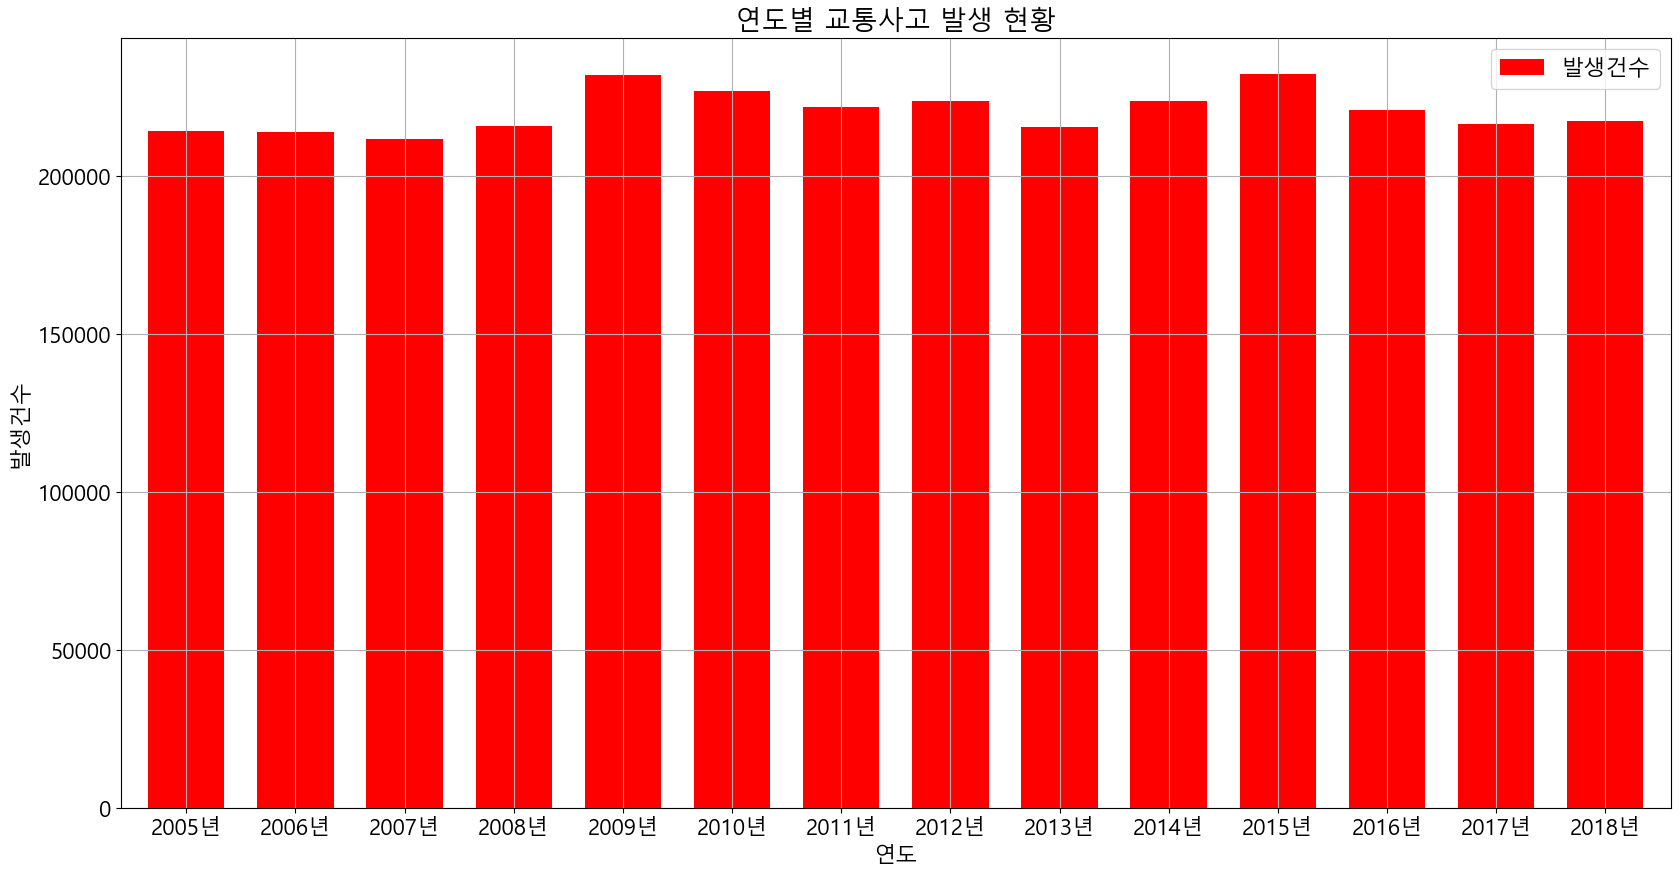

In [27]:
# x축 글자를 수평으로 만들어줌 => rot=0 / 기본값 90도
교통사고df['발생건수'].plot.bar(color='#ff0000', width=0.7, rot=0)

pyplot.grid()
pyplot.legend() # 범례
pyplot.title('연도별 교통사고 발생 현황')
pyplot.xlabel('연도')
pyplot.ylabel('발생건수')

# 만들어 놓은 텍스트 리스트를 x축(행, index)에 넣기 
# 반드시 x축 좌표에 대한 지정이 이루어져야 한다
xpos = np.arange(len(교통사고df.index))
pyplot.xticks(xpos, xtext) 

pyplot.show()

## ===================================================
#### 텍스트 출력 처리, y축 범위 지정

> 텍스트 출력은 그래프의 x, y 좌표를 구해서 모든 문자열을 개별적으로 출력해야한다.

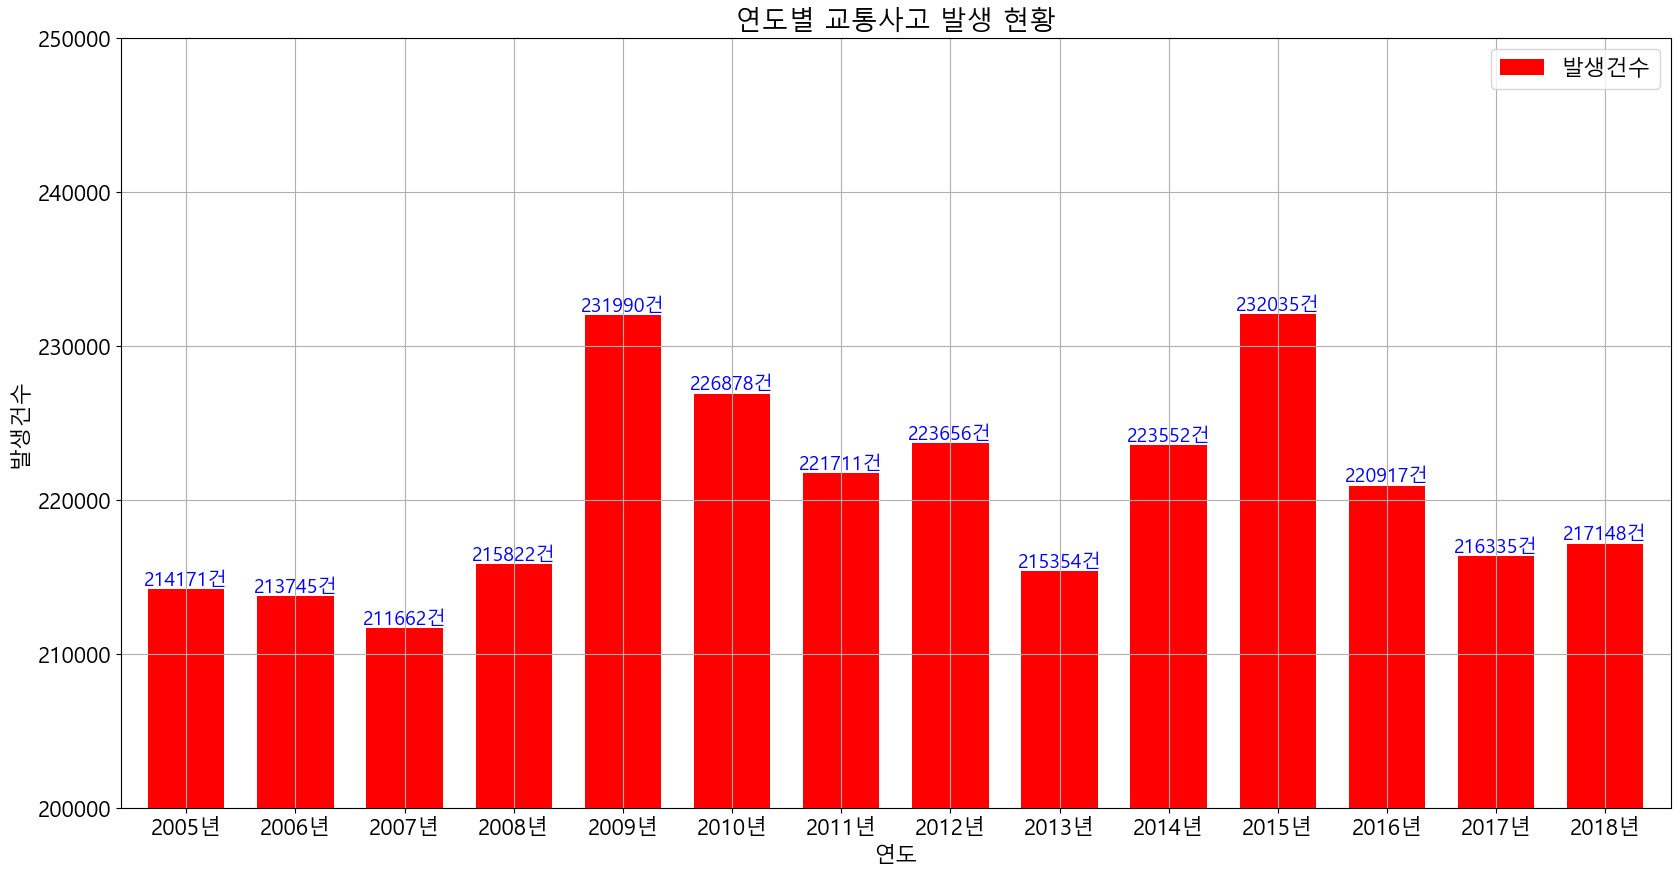

In [34]:
교통사고df['발생건수'].plot.bar(color='#ff0000', width=0.7, rot=0)
pyplot.grid()
pyplot.legend() 
pyplot.title('연도별 교통사고 발생 현황')
pyplot.xlabel('연도')
pyplot.ylabel('발생건수')
pyplot.xticks(xpos, xtext) 

# x, y축의 범위 설정 -> xlim(min, max) , ylim(min, max) 사용
pyplot.ylim(200000, 250000)

# 그래프에 텍스트 표시하기
# 그래프에 표시되는 실제 데이터는 y축 좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for i, v in enumerate(list(교통사고df['발생건수'])) :
    txt = "%d건" %v
    pyplot.text(i, v, txt, fontsize=14, color='#0000ff', 
                horizontalalignment='center', verticalalignment='bottom')

pyplot.show()

### 2) 전체 컬럼에 대한 시각화

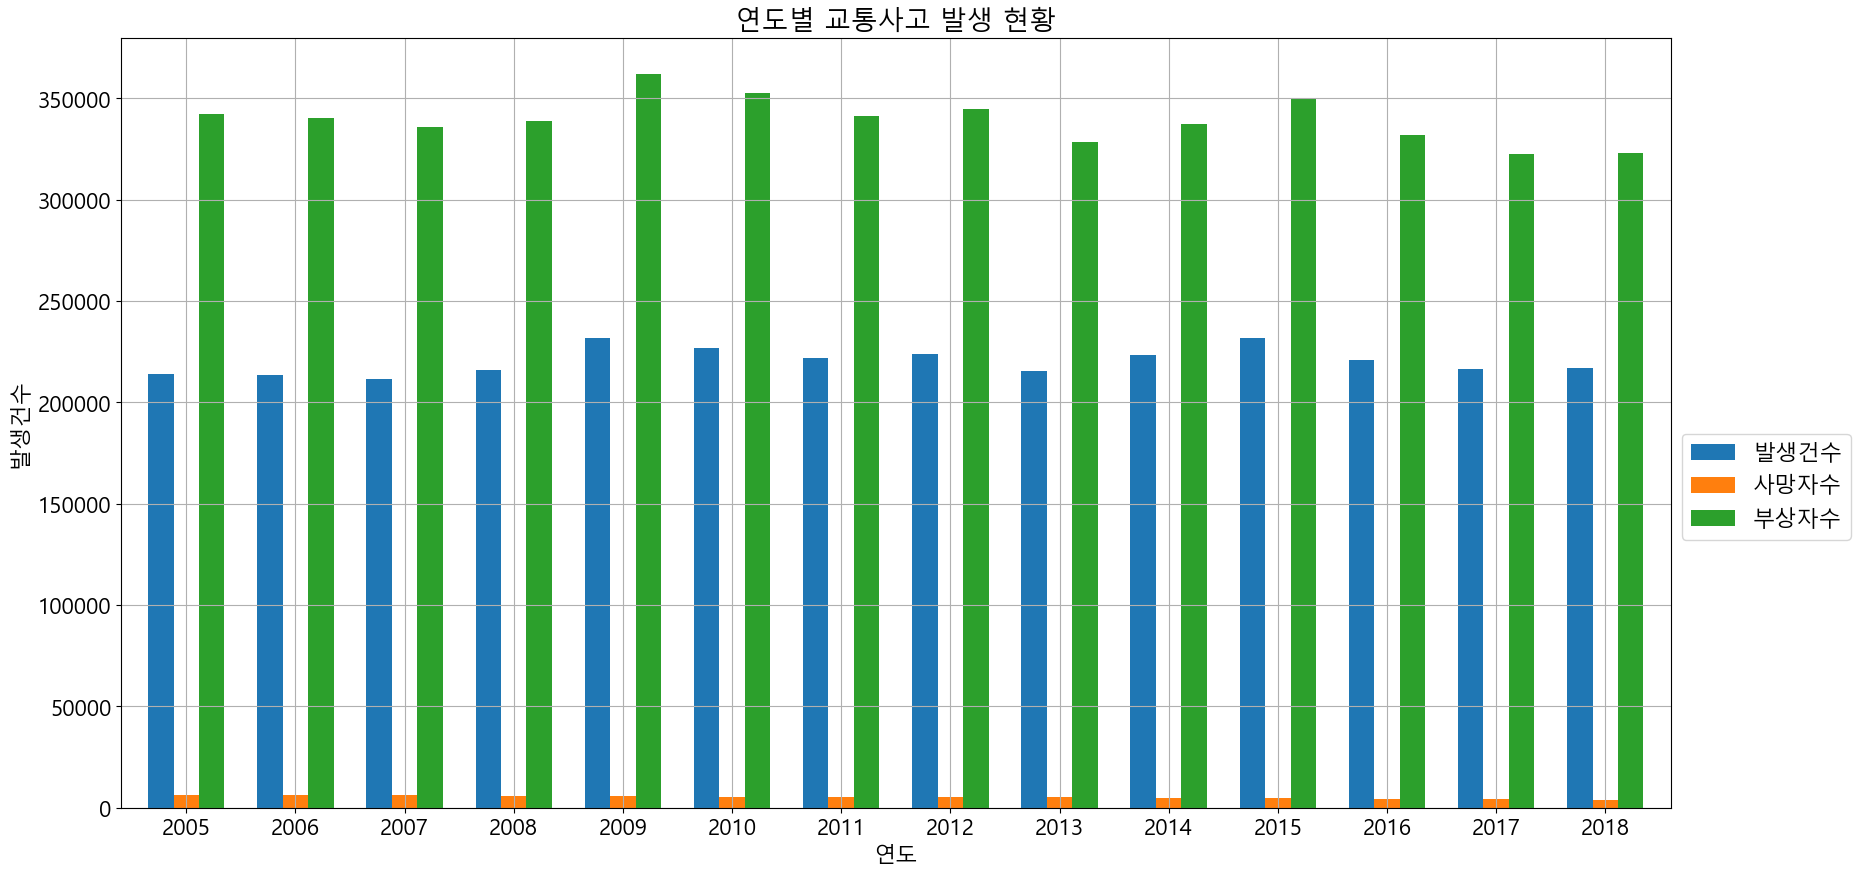

In [46]:
교통사고df.plot.bar(rot=0, width=0.7)
pyplot.grid()

#pyplot.legend() # 범례
# 범례 위치 변경(그래프 좌측하단)
pyplot.legend(bbox_to_anchor=(0, 0)) # bbox_to_anchor(좌0우1 , 상1하0)
# 범례 위치 변경(그래프 우측상단)
pyplot.legend(bbox_to_anchor=(1, 1))
# 범례 위치 변경(그래프 우측중앙)
pyplot.legend(bbox_to_anchor=(1, 0.5))

pyplot.title('연도별 교통사고 발생 현황')
pyplot.xlabel('연도')
pyplot.ylabel('발생건수')
pyplot.show()

## =====================================================

## #05. 가로 막대 그래프

### 1) 특정 컬럼에 대한 시각화

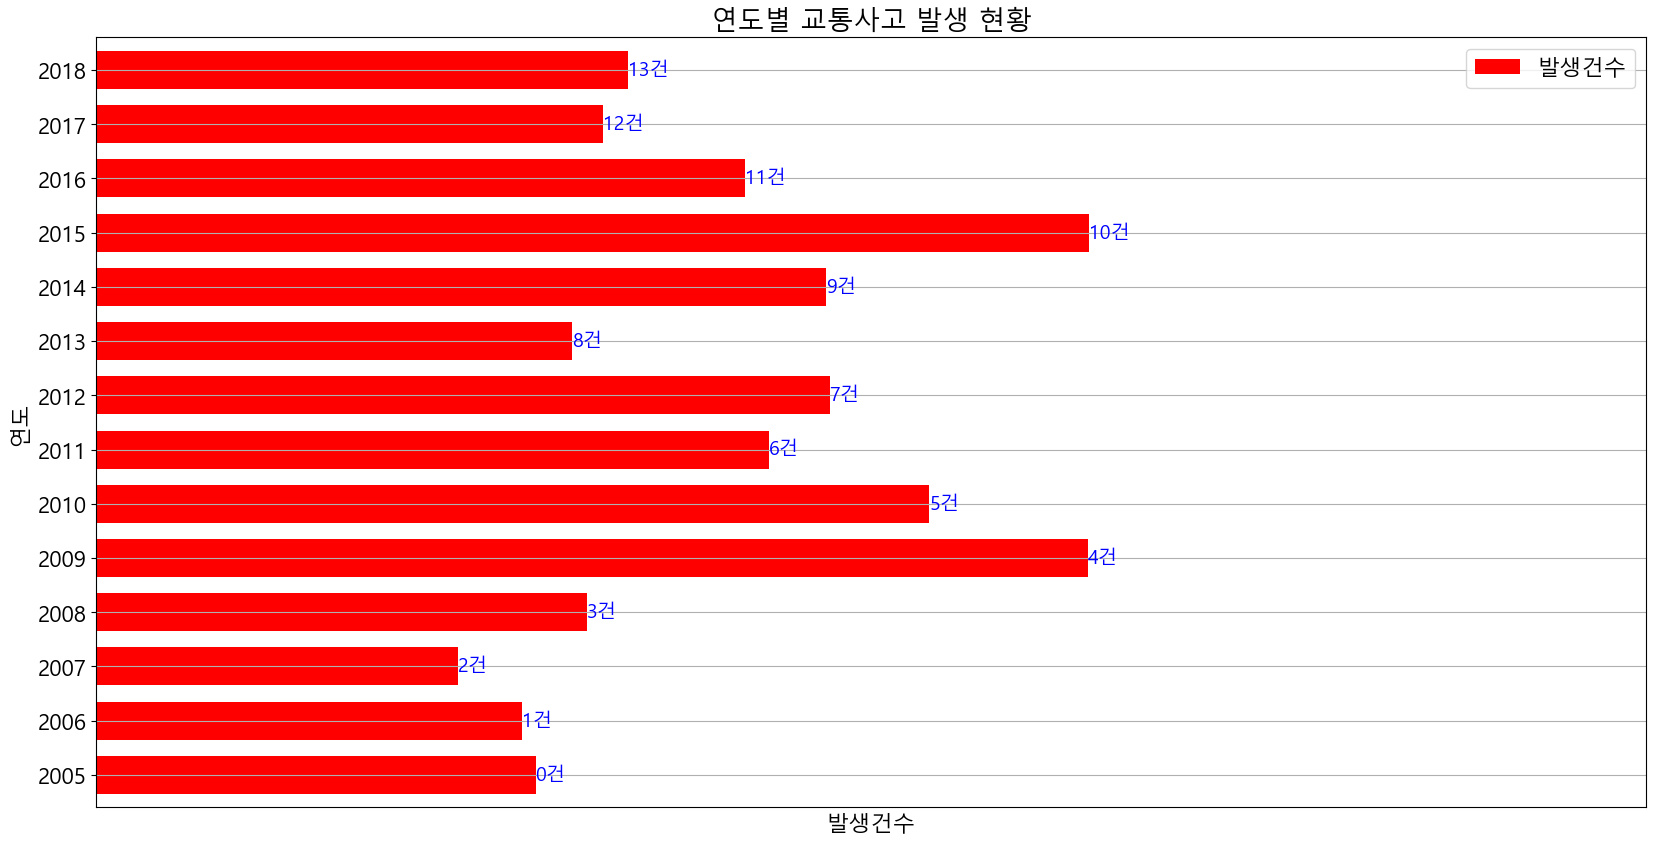

In [63]:
교통사고df['발생건수'].plot.barh(color='#ff0000', width=0.7, rot=0)
pyplot.grid()
pyplot.legend() 
pyplot.title('연도별 교통사고 발생 현황')
pyplot.ylabel('연도')
pyplot.xlabel('발생건수')
pyplot.xticks(xpos, xtext) 

# 가로 막대는 xlim 으로 (세로 막대는 ylim)
pyplot.xlim(200000, 250000)

# i, v 가 반대로 , 수평 left , 수직 center (세로 막대는 수평 center , 수직 bottom)
for v, i in enumerate(list(교통사고df['발생건수'])) :
    txt = "%d건" %v
    pyplot.text(i, v, txt, fontsize=14, color='#0000ff', 
                horizontalalignment='left', verticalalignment='center')

pyplot.show()

### 2) 전체 컬럼 시각화

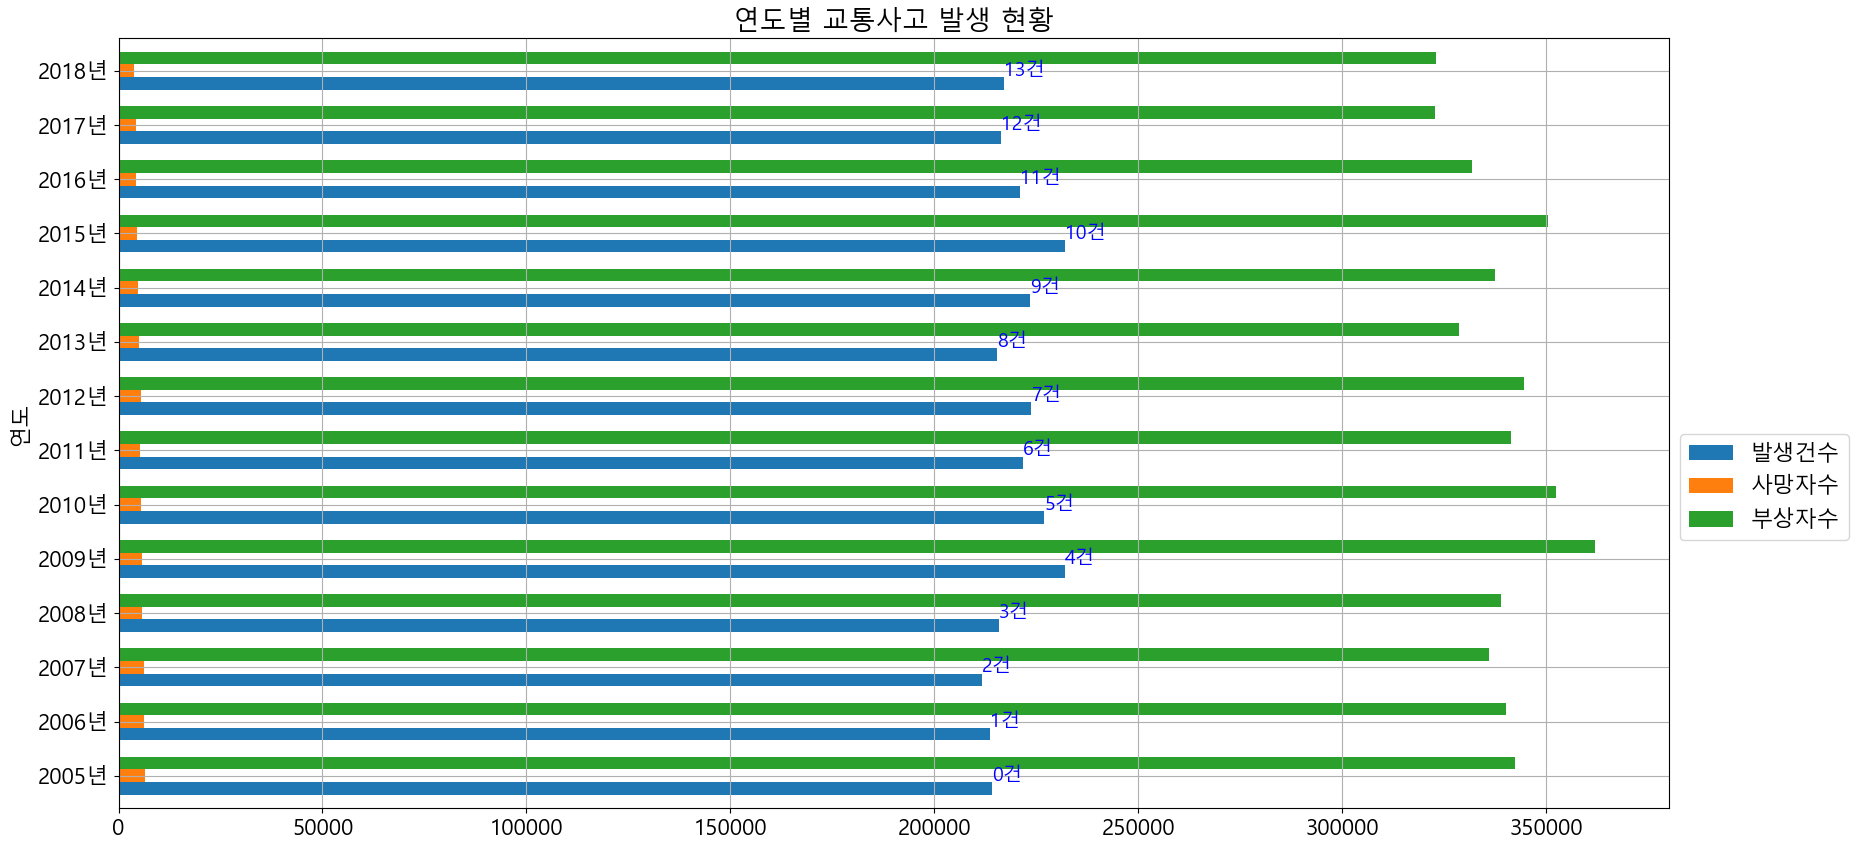

In [68]:
교통사고df.plot.barh(width=0.7, rot=0)
pyplot.grid()
pyplot.legend(bbox_to_anchor=(1, 0.5))
pyplot.title('연도별 교통사고 발생 현황')
# label , ticks 를 y 로 변경
pyplot.ylabel('연도')
pyplot.yticks(xpos, xtext) 

# i, v 가 반대로 , 수평 left , 수직 center (세로 막대는 수평 center , 수직 bottom)
for v, i in enumerate(list(교통사고df['발생건수'])) :
    txt = "%d건" %v
    pyplot.text(i, v, txt, fontsize=14, color='#0000ff', 
                horizontalalignment='left', verticalalignment='center')

pyplot.show()

## ========================================================

## #06. 파이 그래프

### 데이터프레임의 특정 컬럼을 지정하여 전체를 기준으로 어느 정도의 비율을 차지하는지 시각화하는 그래프

### 1) 파이 그래프 기본형

In [70]:
# 각 컬럼별로 평균 구하기
교통사고평균 = 교통사고df.mean()
교통사고평균

발생건수    220355.428571
사망자수      5245.428571
부상자수    339415.214286
dtype: float64

In [72]:
# 구해진 결과를 가지고 데이터프레임 생성
교통사고평균df = DataFrame(교통사고평균, columns=['교통사고평균'])
교통사고평균df

,교통사고평균
발생건수,220355.428571
사망자수,5245.428571
부상자수,339415.214286


### 파이 그래프 표시 => 반드시 특정 컬럼을 지정해야한다.

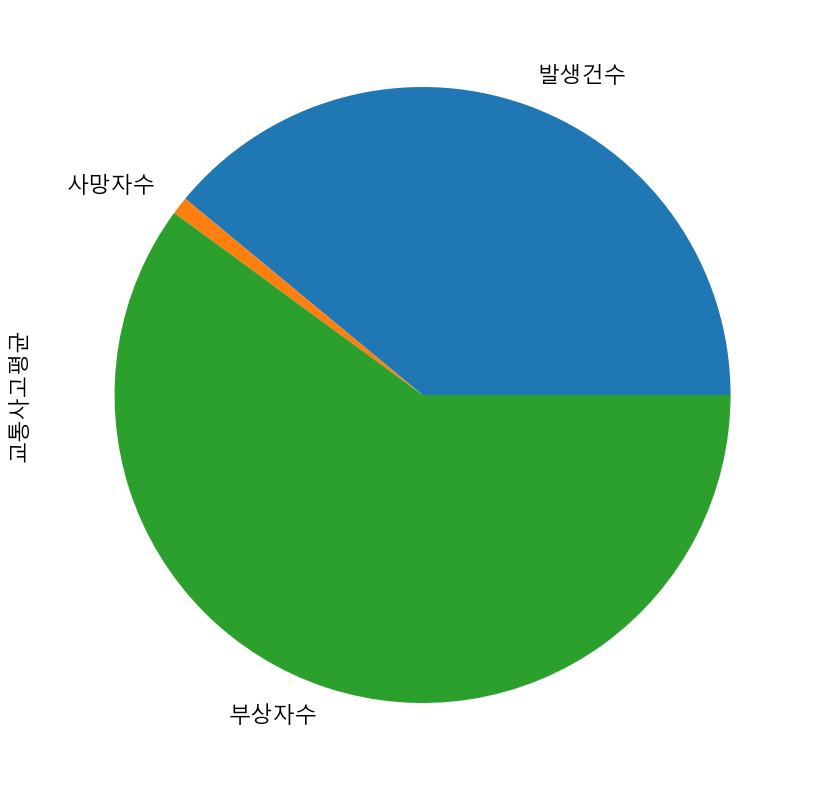

In [74]:
교통사고평균df['교통사고평균'].plot.pie()
pyplot.show()

#### 1) 파이 그래프의 옵션 넣기

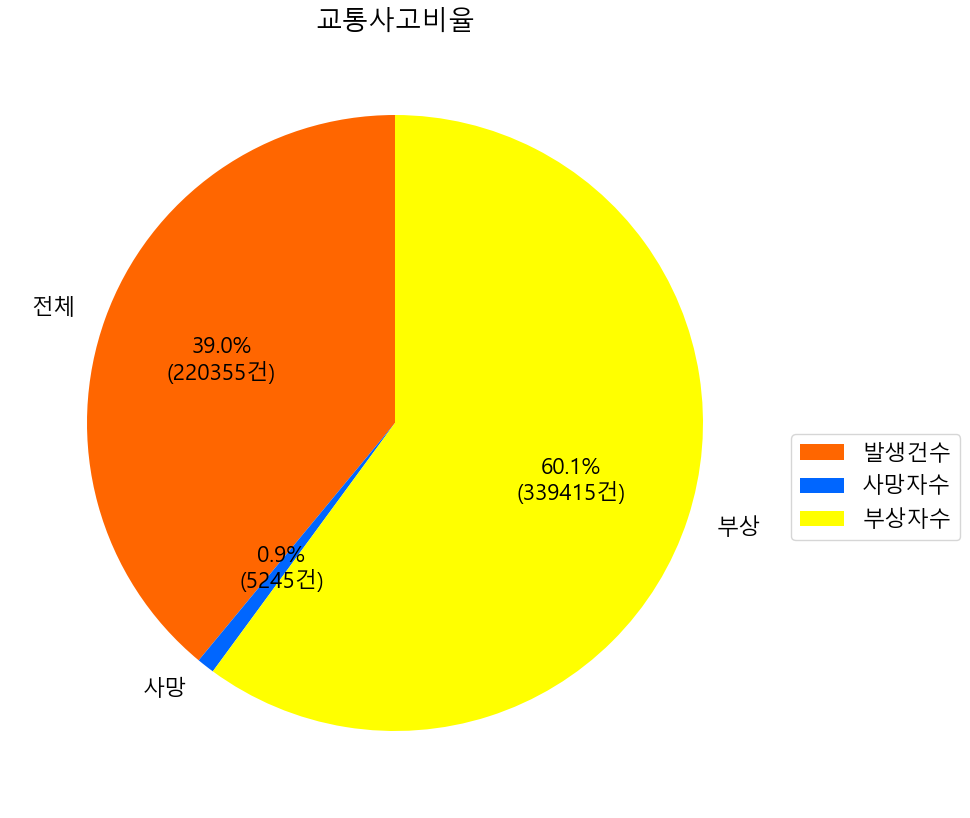

In [135]:
# 4. 건수를 리턴하는 함수 만들기
# 각 교통사고 컬럼간의 비율이 들어온다.
def make_autopct(비율) :
    per = '%.1f%%' %비율
    cnt = int(교통사고평균df['교통사고평균'].sum() * 비율 / 100)
    str = "{}\n({}건)".format(per, cnt)
    return str

교통사고평균df['교통사고평균'].plot.pie(labels=['전체', '사망', '부상'],
                                      colors=['#ff6600', '#0066ff', '#ffff00'],
                                      #autopct='%.1f%%', startangle=90)
                                      autopct=make_autopct, startangle=90)
# 1. 타이틀
pyplot.title('교통사고비율')

# 2. y축 정보 표시 안함
pyplot.ylabel(None)

# 3. 범례
pyplot.legend(labels=list(교통사고평균df.index), bbox_to_anchor=(1, 0.5))

pyplot.show()

## =====================================================

## #07. 산점도 그래프

- `두 변수간의 영향력`을 보여주기 위해서 가로축과 세로축에 대한 `데이터 포인트`를 그리는데 사용
- `데이터 포인트`들이 뭉쳐있을 수록 두 변수간의 관련성 정도가 높다고 해석한다.

### 1) 교통사고 발생건수와 부상자수 간의 상관관계

- 첫번째 변수 : 발생건수
- 두번째 변수 : 부상자수

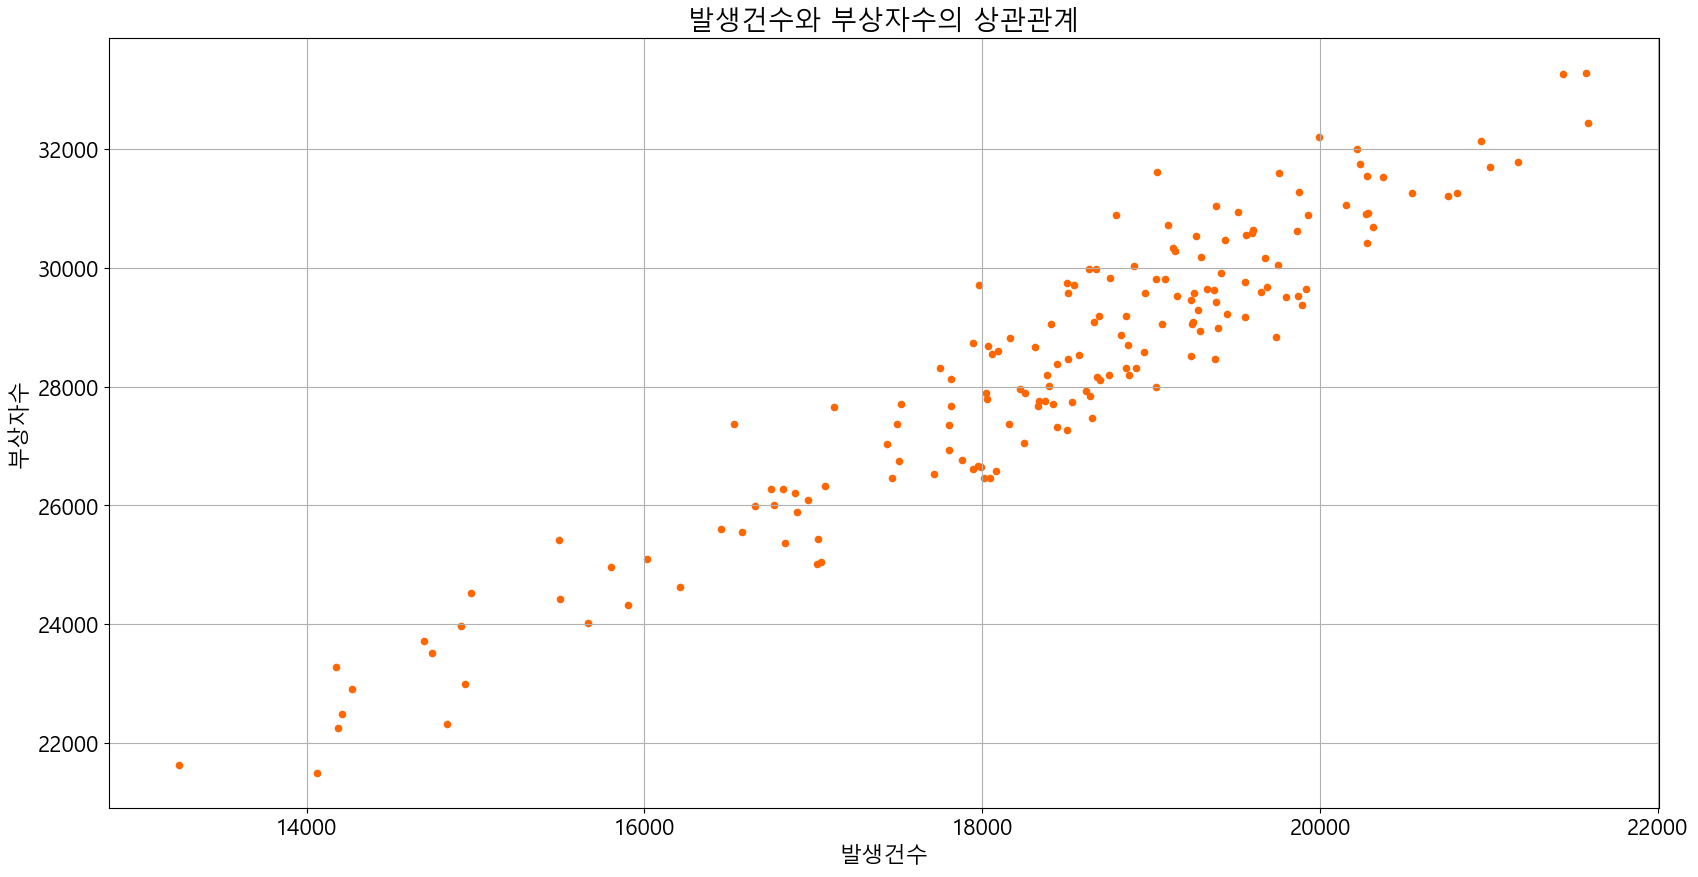

In [141]:
# 마커는 아무거나 쓰는게 아니라 아래에서 선택해서 사용
# marker -> o, v, ^, < >, 8, s, p, *, h ,H, D, d, P, X
교통사고.plot.scatter(x='발생건수', y='부상자수', marker='o', color='#ff6600')
pyplot.grid()
pyplot.title('발생건수와 부상자수의 상관관계')
pyplot.ylabel('부상자수')
pyplot.xlabel('발생건수')
pyplot.show()

### => 산점도 그래프 해석

- 점들이 `모여` 있을수록 두 변수간의 관계성이 `높다`.
- 점들이 `흩어져` 있을수록 두 변수간의 관계성이 `적다`. 

## =================================================

### - 정의 관계 : x 가 증가할때 y 도 증가하는 직선에 가까운 형태
### - 역의 관계 : x 가 증가할때 y 도 감소하는 형태
####
### - 선형 관계 : 점들이 직선에 가깝게 배치된 형태
### - 비선형 관계 : 점들이 직선이 아닌 형태로 배치된 형태

## =================================================

### - 상관분석

연속형 변수로 측정된 두 변수간의 선형적 관계를 분석하는 관계

연속형 변수는 산술 평균을 계산할 수 있는 숫자형의 데이터이며, 선형적 관계라 함은 흔히 비례식이 성립되는 관계를 말한다.

> 예를들어 A변수가 증가함에 따라 B변수도 증가되는지 혹은 감소하는지를 분석하는 것이다.

상관분석은 두 변수간의 선형적 관계에 초점을 두고 있으며 `선형관계를 갖는가? 어느방향으로 형성되어 있는가? 그 관계의 정도는 얼마나 큰가?`와 

같은 질문을 던지며 결과 해석을 수행한다.

### - 상관계수

상관분석에서 두 변수 사이의 선형적인 관계정도를 나타내기 위해 사용되는 값.

> 수하적인 공식에 의해 구해야 한다.

상관분석에는 측정 데이터에 따라 피어슨 상관분석, 상곤분석 등의 여러가지 분석방법이 있지만, 일반적으로 `피어슨 상관계수`를 의미한다.

| 상관계수 | 설명 |
| -------- | ---- |
|  1  | 직선형 정의 관계 |
|  -1 | 직선형 역의 관계 |
|  0  | 모든 점들이 분산되어 있는 형태 |

> 상관계수 1과 0 사이에 소수점 형태로 점의 분포도를 표현한다.

## =====================================================

### - 추세선

#### 차트 위에 그려진 대각선들
- 특정 데이터 지점을 연결하며 분석가가 보다 쉽게 데이터의 움직임을 시각화하고 추세를 알 수 있게 한다.
- 추세선을 기술적 분석의 가장 기초적인 도구 중 하나로 간주한다.

#### 1) 추세선을 포함한 산점도 그래프

In [143]:
# 추세선을 만들자
x = 교통사고['발생건수']
y = 교통사고['부상자수']

# x, y 를 기반으로 추세선을 위한 계산을 하자
z = np.polyfit(x, y, 1) # (x, y, 1차원)
f = np.poly1d(z)

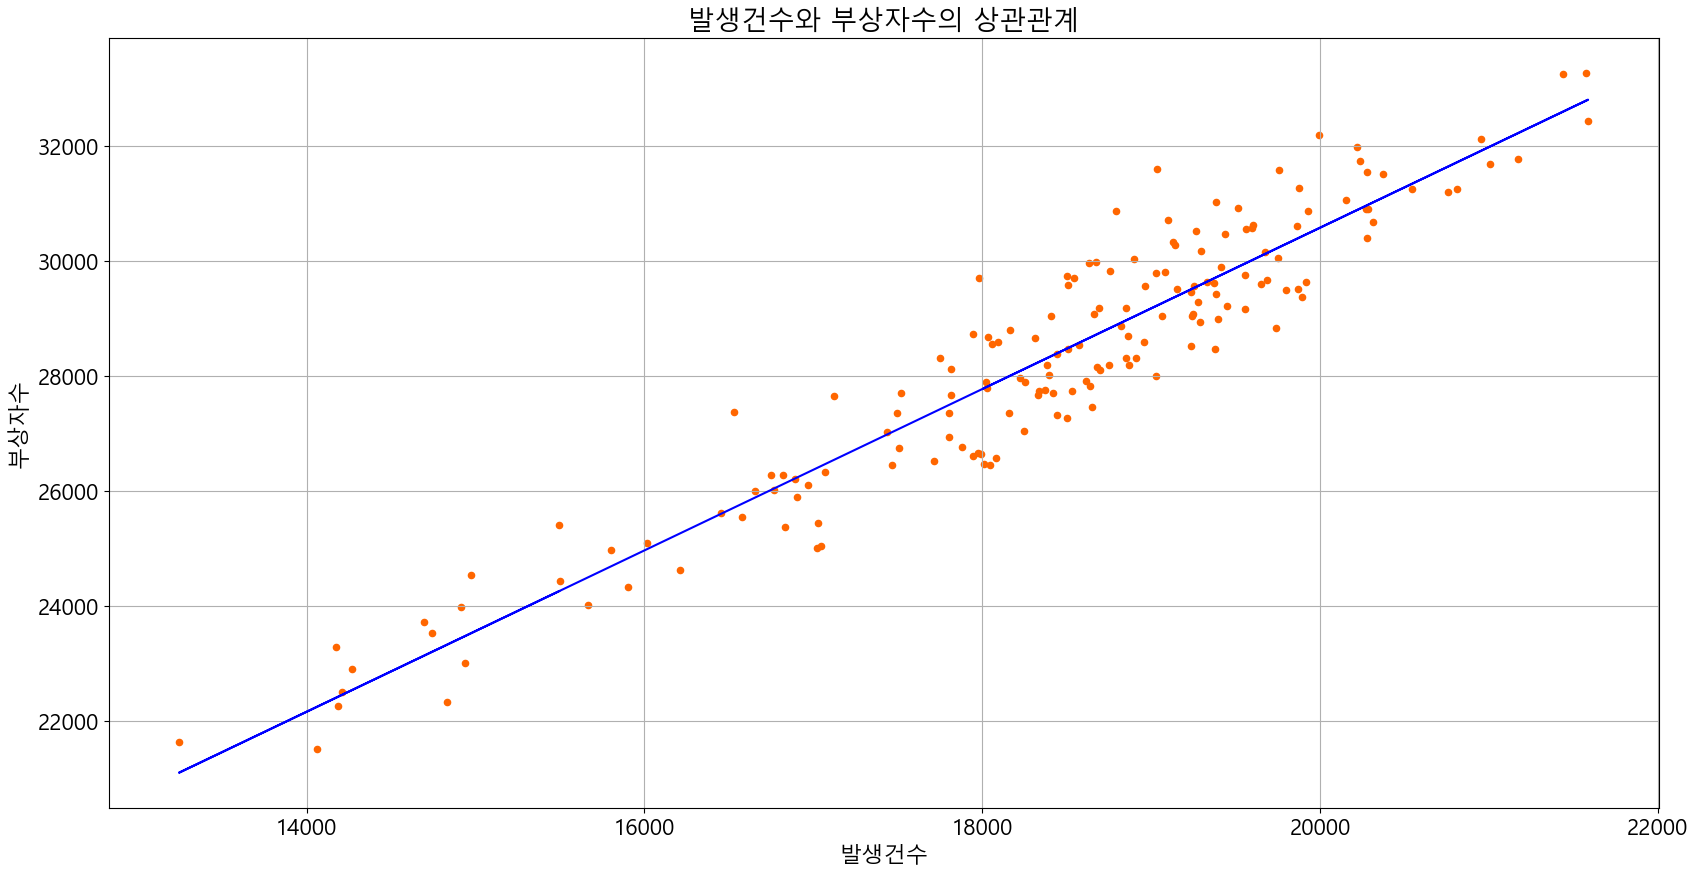

In [144]:
# 추세선이 없는 산점도 그래프
교통사고.plot.scatter(x='발생건수', y='부상자수', marker='o', color='#ff6600')
pyplot.grid()
pyplot.title('발생건수와 부상자수의 상관관계')
pyplot.ylabel('부상자수')
pyplot.xlabel('발생건수')

#추세선 추가
pyplot.plot(x, f(x), '#0000ff')

pyplot.show()